In [1224]:
import pandas as pd, numpy as np, time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV

# Librerías para plots
from sklearn import tree
#import graphviz
from scipy.stats import norm
from scipy.stats import t
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime, timedelta
%matplotlib inline

In [1229]:
#df = pd.read_csv('/Users/lucas_botella/Downloads/df_covid_processed.csv')
df = pd.read_csv('/Users/lucas_botella/Downloads/df_covid_processed_FINAL.csv')
del df['Unnamed: 0']
#del df['%youth_unemployment_total']
#del df['total_vaccinations_per_100']
#del df['urban_population']
del df['number_of_arrivals']
del df['deaths_prev_18']
del df['deaths']
del df['life_expectancy']
del df['%df_population_gr_65']
del df['average_deaths_2015_2019_all_ages']
del df['month']
del df['Excess mortality P-scores, all ages']
del df['nurses_per_1000']
del df['doctors_per_1000']
del df['beds_per_1000']


df['total_vaccinations_per_100'] = df['total_vaccinations_per_100'].fillna(0)
df['accumulated'] = df['accumulated'].fillna(0)
df['urban_population'] = df['urban_population'].fillna(df['urban_population'].mean())
df['parks'] = df['parks'].fillna(df['parks'].mean())
df['temp'] = df['temp'].fillna(df['temp'].mean())
df['prcp'] = df['prcp'].fillna(df['prcp'].mean())
df['%youth_unemployment_total'] = df['%youth_unemployment_total'].fillna(df['%youth_unemployment_total'].mean())
df=df[[c for c in df if c not in ['R0']] 
       + ['R0']]

#df['nurses_per_1000']=df.apply(lambda x: x['nurses_per_1000'] if x['Excess mortality P-scores, all ages Prev 18 days'] <= 0 else 
#         x['nurses_per_1000'] - (x['nurses_per_1000']*x['Excess mortality P-scores, all ages Prev 18 days']), axis=1)
#df['doctors_per_1000']=df.apply(lambda x: x['doctors_per_1000'] if x['Excess mortality P-scores, all ages Prev 18 days'] <= 0 else 
#         x['doctors_per_1000'] - (x['doctors_per_1000']*x['Excess mortality P-scores, all ages Prev 18 days']), axis=1)
#df['beds_per_1000']=df.apply(lambda x: x['beds_per_1000'] if x['Excess mortality P-scores, all ages Prev 18 days'] <= 0 else 
#         x['beds_per_1000'] - (x['beds_per_1000']*x['Excess mortality P-scores, all ages Prev 18 days']), axis=1)
df

,Code,Date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,...,urban_population,total_vaccinations_per_100,%youth_unemployment_total,UN Population Division (Median Age) (2017),"Excess mortality P-scores, all ages Prev 36 days","Excess mortality P-scores, all ages Prev 18 days",deaths_prev_36,accumulated,R0_prev18,R0
0,AUS,2020-03-08,1.05,1.72,-0.74,4.98,-2.09,7.93,2.00,1.00,...,85.90,0.00,11.84,37.90,5.12,6.18,3286.31,0.00,1.01,0.99
1,AUS,2020-03-15,0.76,1.51,-1.29,7.70,-0.82,10.57,2.00,1.00,...,85.90,0.00,11.84,37.90,3.32,4.53,3230.04,0.00,1.01,1.00
2,AUS,2020-03-22,1.29,3.37,-1.08,9.35,0.94,10.88,2.00,1.00,...,85.90,0.00,11.84,37.90,4.42,4.92,3264.43,0.00,1.00,1.02
3,AUS,2020-03-29,0.71,8.98,-0.39,5.45,-2.86,8.33,2.00,1.00,...,85.90,0.00,11.84,37.90,6.18,4.67,3319.45,0.00,0.99,1.07
4,AUS,2020-04-05,-0.90,15.16,0.45,-1.06,-4.96,6.96,2.00,1.00,...,85.90,0.00,11.84,37.90,4.53,4.62,2680.93,0.00,1.00,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,USA,2021-01-10,-17.69,-4.06,10.18,-36.04,-19.76,-28.10,1.00,3.00,...,82.06,0.22,8.30,38.30,32.09,41.25,98076.33,0.18,1.07,0.97
2038,USA,2021-01-17,-22.78,-3.98,12.65,-38.88,-16.65,-42.08,1.00,3.00,...,82.06,0.69,8.30,38.30,36.03,41.07,101001.76,0.19,1.04,0.95
2039,USA,2021-01-24,-23.63,-9.84,14.06,-41.02,-15.86,-41.71,1.00,3.00,...,82.06,1.42,8.30,38.30,40.68,44.75,104454.37,0.20,1.03,0.89
2040,USA,2021-01-31,-23.98,-11.39,11.45,-39.57,-22.59,-29.00,1.00,3.00,...,82.06,2.46,8.30,38.30,41.25,36.74,104877.60,0.21,0.97,0.91


!conda install -c conda-forge feature_engine

In [1144]:
from sklearn.preprocessing import KBinsDiscretizer
df=df.fillna(df.median())
discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')
X=df[df.columns[2:-1]]
y=pd.DataFrame(df[df.columns[-1]])
discretizer.fit(y)
Yt = discretizer.transform(y)

In [1145]:
Yt=pd.DataFrame(Yt)
df['target']=Yt
df_aux=df[df.columns]
del df['R0']
X=df[df.columns[2:-1]]
y=df['target']
X

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,international_travel_controls,restrictions_internal_movements,...,beds_per_1000,number_of_arrivals,urban_population,total_vaccinations_per_100,%youth_unemployment_total,%df_population_gr_65,UN Population Division (Median Age) (2017),"Excess mortality P-scores, all ages Prev 18 days",accumulated,R0_prev18
0,1.05,1.72,-0.74,4.98,-2.09,7.93,2.00,1.00,3.00,0.00,...,3.84,8263000.00,85.90,1.79,11.84,15.92,37.90,6.18,0.00,1.01
1,0.76,1.51,-1.29,7.70,-0.82,10.57,2.00,1.00,3.00,0.00,...,3.84,8263000.00,85.90,1.79,11.84,15.92,37.90,4.53,0.00,1.01
2,1.29,3.37,-1.08,9.35,0.94,10.88,2.00,1.00,3.00,0.00,...,3.84,8263000.00,85.90,1.79,11.84,15.92,37.90,4.92,0.00,1.00
3,0.71,8.98,-0.39,5.45,-2.86,8.33,2.00,1.00,3.00,0.00,...,3.84,8263000.00,85.90,1.79,11.84,15.92,37.90,4.67,0.00,0.99
4,-0.90,15.16,0.45,-1.06,-4.96,6.96,2.00,1.00,3.00,0.00,...,3.84,8263000.00,85.90,1.79,11.84,15.92,37.90,4.62,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,-17.69,-4.06,10.18,-36.04,-19.76,-28.10,1.00,3.00,3.00,2.00,...,2.87,75608000.00,82.06,0.22,8.30,16.21,38.30,41.25,0.18,1.07
2038,-22.78,-3.98,12.65,-38.88,-16.65,-42.08,1.00,3.00,3.00,2.00,...,2.87,75608000.00,82.06,0.69,8.30,16.21,38.30,41.07,0.19,1.04
2039,-23.63,-9.84,14.06,-41.02,-15.86,-41.71,1.00,3.00,3.00,2.00,...,2.87,75608000.00,82.06,1.42,8.30,16.21,38.30,44.75,0.20,1.03
2040,-23.98,-11.39,11.45,-39.57,-22.59,-29.00,1.00,3.00,3.00,2.00,...,2.87,75608000.00,82.06,2.46,8.30,16.21,38.30,36.74,0.21,0.97


In [1192]:
df

,Code,Date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,...,number_of_arrivals,urban_population,total_vaccinations_per_100,%youth_unemployment_total,%df_population_gr_65,UN Population Division (Median Age) (2017),"Excess mortality P-scores, all ages Prev 18 days",accumulated,R0_prev18,R0
0,AUS,2020-03-08,1.05,1.72,-0.74,4.98,-2.09,7.93,2.00,1.00,...,8263000.00,85.90,nan,11.84,15.92,37.90,6.18,0.00,1.01,0.99
1,AUS,2020-03-15,0.76,1.51,-1.29,7.70,-0.82,10.57,2.00,1.00,...,8263000.00,85.90,nan,11.84,15.92,37.90,4.53,0.00,1.01,1.00
2,AUS,2020-03-22,1.29,3.37,-1.08,9.35,0.94,10.88,2.00,1.00,...,8263000.00,85.90,nan,11.84,15.92,37.90,4.92,0.00,1.00,1.02
3,AUS,2020-03-29,0.71,8.98,-0.39,5.45,-2.86,8.33,2.00,1.00,...,8263000.00,85.90,nan,11.84,15.92,37.90,4.67,0.00,0.99,1.07
4,AUS,2020-04-05,-0.90,15.16,0.45,-1.06,-4.96,6.96,2.00,1.00,...,8263000.00,85.90,nan,11.84,15.92,37.90,4.62,0.00,1.00,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,USA,2021-01-10,-17.69,-4.06,10.18,-36.04,-19.76,-28.10,1.00,3.00,...,75608000.00,82.06,0.22,8.30,16.21,38.30,41.25,0.18,1.07,0.97
2038,USA,2021-01-17,-22.78,-3.98,12.65,-38.88,-16.65,-42.08,1.00,3.00,...,75608000.00,82.06,0.69,8.30,16.21,38.30,41.07,0.19,1.04,0.95
2039,USA,2021-01-24,-23.63,-9.84,14.06,-41.02,-15.86,-41.71,1.00,3.00,...,75608000.00,82.06,1.42,8.30,16.21,38.30,44.75,0.20,1.03,0.89
2040,USA,2021-01-31,-23.98,-11.39,11.45,-39.57,-22.59,-29.00,1.00,3.00,...,75608000.00,82.06,2.46,8.30,16.21,38.30,36.74,0.21,0.97,0.91


In [1230]:
df['R0'] = df['R0'].apply(lambda x: 0 if x < 1 else 1)

In [1231]:
df.isna().sum()

Code                                                0
Date                                                0
retail_and_recreation                               0
grocery_and_pharmacy                                0
residential                                         0
transit_stations                                    0
parks                                               0
workplaces                                          0
contact_tracing                                     0
testing_policy                                      0
international_travel_controls                       0
restrictions_internal_movements                     0
close_public_transport                              0
public_information_campaigns                        0
facial_coverings                                    0
stay_home_requirements                              0
restriction_gatherings                              0
cancel_public_events                                0
workplace_closures          

In [1232]:
date1=pd.Timestamp(2021, 1, 1)

X_1=df[(pd.to_datetime(df['Date']) <= date1)]
X_2=df[(pd.to_datetime(df['Date']) > date1)]
X_train=X_1[X_1.columns[2:-1]]
X_test=X_2[X_2.columns[2:-1]]
y_train=X_1[X_1.columns[-1]]
y_test=X_2[X_2.columns[-1]]

In [1233]:
y_test

47      0
48      1
49      1
89      0
90      0
       ..
2037    0
2038    0
2039    0
2040    0
2041    0
Name: R0, Length: 324, dtype: int64

In [1234]:
# A parameter grid for XGBoost
params = {'max_depth': [1,2,3,4,5,6,7]}

# Initialize XGB and GridSearch
xgb = DecisionTreeClassifier()

grid = GridSearchCV(xgb, params)

In [1235]:
date1=pd.Timestamp(2021, 1, 1)

X_1=df[(pd.to_datetime(df['Date']) <= date1)]
X_2=df[(pd.to_datetime(df['Date']) > date1)]
X_train=X_1[X_1.columns[2:-1]]
X_test=X_2[X_2.columns[2:-1]]
y_train=X_1[X_1.columns[-1]]
y_test=X_2[X_2.columns[-1]]

In [1236]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7]})

In [1237]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [1238]:
X_1

,Code,Date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,...,urban_population,total_vaccinations_per_100,%youth_unemployment_total,UN Population Division (Median Age) (2017),"Excess mortality P-scores, all ages Prev 36 days","Excess mortality P-scores, all ages Prev 18 days",deaths_prev_36,accumulated,R0_prev18,R0
0,AUS,2020-03-08,1.05,1.72,-0.74,4.98,-2.09,7.93,2.00,1.00,...,85.90,0.00,11.84,37.90,5.12,6.18,3286.31,0.00,1.01,0
1,AUS,2020-03-15,0.76,1.51,-1.29,7.70,-0.82,10.57,2.00,1.00,...,85.90,0.00,11.84,37.90,3.32,4.53,3230.04,0.00,1.01,1
2,AUS,2020-03-22,1.29,3.37,-1.08,9.35,0.94,10.88,2.00,1.00,...,85.90,0.00,11.84,37.90,4.42,4.92,3264.43,0.00,1.00,1
3,AUS,2020-03-29,0.71,8.98,-0.39,5.45,-2.86,8.33,2.00,1.00,...,85.90,0.00,11.84,37.90,6.18,4.67,3319.45,0.00,0.99,1
4,AUS,2020-04-05,-0.90,15.16,0.45,-1.06,-4.96,6.96,2.00,1.00,...,85.90,0.00,11.84,37.90,4.53,4.62,2680.93,0.00,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,USA,2020-11-29,-16.75,-7.27,7.94,-32.55,6.92,-25.45,1.00,3.00,...,82.06,0.00,8.30,38.30,14.87,24.69,77066.51,0.14,1.09,1
2032,USA,2020-12-06,-18.29,-8.08,9.02,-34.51,-4.69,-26.55,1.00,3.00,...,82.06,0.00,8.30,38.30,16.83,25.98,65866.13,0.14,1.08,1
2033,USA,2020-12-13,-18.65,-5.43,9.18,-33.86,-7.63,-26.35,1.00,3.00,...,82.06,0.00,8.30,38.30,18.87,29.93,67016.23,0.15,1.09,1
2034,USA,2020-12-20,-25.47,-8.08,12.20,-38.27,-8.90,-39.45,1.00,3.00,...,82.06,0.00,8.30,38.30,24.69,32.09,70297.42,0.15,1.06,1


In [1239]:
grid.best_score_

0.6658705674961014

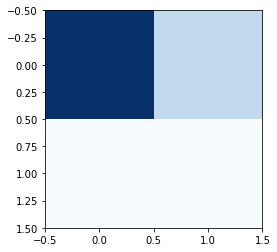

In [1240]:
dtree_predictions = grid.best_estimator_.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
plt.imshow(cm, cmap=plt.cm.Blues) 

In [1241]:
print(metrics.classification_report(y_test, dtree_predictions, digits=3))

              precision    recall  f1-score   support

           0      0.767     0.674     0.718       230
           1      0.385     0.500     0.435        94

    accuracy                          0.623       324
   macro avg      0.576     0.587     0.576       324
weighted avg      0.656     0.623     0.636       324



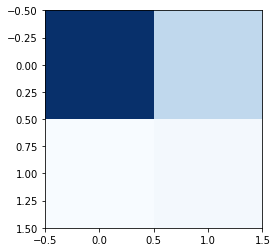

In [1242]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
date1=pd.Timestamp(2021, 1, 1)

X_1=df[(pd.to_datetime(df['Date']) <= date1)]
X_2=df[(pd.to_datetime(df['Date']) > date1)]
X_train=X_1[X_1.columns[2:-1]]
X_test=X_2[X_2.columns[2:-1]]
y_train=X_1[X_1.columns[-1]]
y_test=X_2[X_2.columns[-1]]
  
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 7).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
plt.imshow(cm, cmap=plt.cm.Blues) #plot confusion matrix grid

In [1243]:
from sklearn import metrics
print(metrics.classification_report(y_test, dtree_predictions, digits=3))

              precision    recall  f1-score   support

           0      0.771     0.674     0.719       230
           1      0.390     0.511     0.442        94

    accuracy                          0.627       324
   macro avg      0.581     0.592     0.581       324
weighted avg      0.661     0.627     0.639       324



In [1244]:
df_aux[df_aux['target']==3.0].describe()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,international_travel_controls,restrictions_internal_movements,...,urban_population,total_vaccinations_per_100,%youth_unemployment_total,%df_population_gr_65,UN Population Division (Median Age) (2017),"Excess mortality P-scores, all ages Prev 18 days",accumulated,R0_prev18,R0,target
count,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
25%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
50%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
75%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
max,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [1127]:
df_aux

,Code,Date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,...,urban_population,total_vaccinations_per_100,%youth_unemployment_total,%df_population_gr_65,UN Population Division (Median Age) (2017),"Excess mortality P-scores, all ages Prev 18 days",accumulated,R0_prev18,"Excess mortality P-scores, all ages",target
0,AUS,2020-03-08,1.05,1.72,-0.74,4.98,-2.09,7.93,2.00,1.00,...,85.90,1.79,11.84,15.92,37.90,6.18,0.00,1.01,4.67,0.00
1,AUS,2020-03-15,0.76,1.51,-1.29,7.70,-0.82,10.57,2.00,1.00,...,85.90,1.79,11.84,15.92,37.90,4.53,0.00,1.01,4.62,0.00
2,AUS,2020-03-22,1.29,3.37,-1.08,9.35,0.94,10.88,2.00,1.00,...,85.90,1.79,11.84,15.92,37.90,4.92,0.00,1.00,7.28,0.00
3,AUS,2020-03-29,0.71,8.98,-0.39,5.45,-2.86,8.33,2.00,1.00,...,85.90,1.79,11.84,15.92,37.90,4.67,0.00,0.99,12.13,0.00
4,AUS,2020-04-05,-0.90,15.16,0.45,-1.06,-4.96,6.96,2.00,1.00,...,85.90,1.79,11.84,15.92,37.90,4.62,0.00,1.00,11.31,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,USA,2021-01-10,-17.69,-4.06,10.18,-36.04,-19.76,-28.10,1.00,3.00,...,82.06,0.22,8.30,16.21,38.30,41.25,0.18,1.07,36.74,1.00
2038,USA,2021-01-17,-22.78,-3.98,12.65,-38.88,-16.65,-42.08,1.00,3.00,...,82.06,0.69,8.30,16.21,38.30,41.07,0.19,1.04,33.91,0.00
2039,USA,2021-01-24,-23.63,-9.84,14.06,-41.02,-15.86,-41.71,1.00,3.00,...,82.06,1.42,8.30,16.21,38.30,44.75,0.20,1.03,29.53,0.00
2040,USA,2021-01-31,-23.98,-11.39,11.45,-39.57,-22.59,-29.00,1.00,3.00,...,82.06,2.46,8.30,16.21,38.30,36.74,0.21,0.97,24.53,0.00


In [1255]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [1256]:
# Model performance on training set
y_pred_train =classifier.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train))

Accuracy: 0.72
Confusion Matrix: 
 [[535 229]
 [248 706]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       764
           1       0.76      0.74      0.75       954

    accuracy                           0.72      1718
   macro avg       0.72      0.72      0.72      1718
weighted avg       0.72      0.72      0.72      1718



In [1257]:
# Predicting the test results
y_pred=classifier.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred))

Accuracy: 0.58
Confusion Matrix: 
 [[131  99]
 [ 38  56]]
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       230
           1       0.36      0.60      0.45        94

    accuracy                           0.58       324
   macro avg       0.57      0.58      0.55       324
weighted avg       0.66      0.58      0.60       324



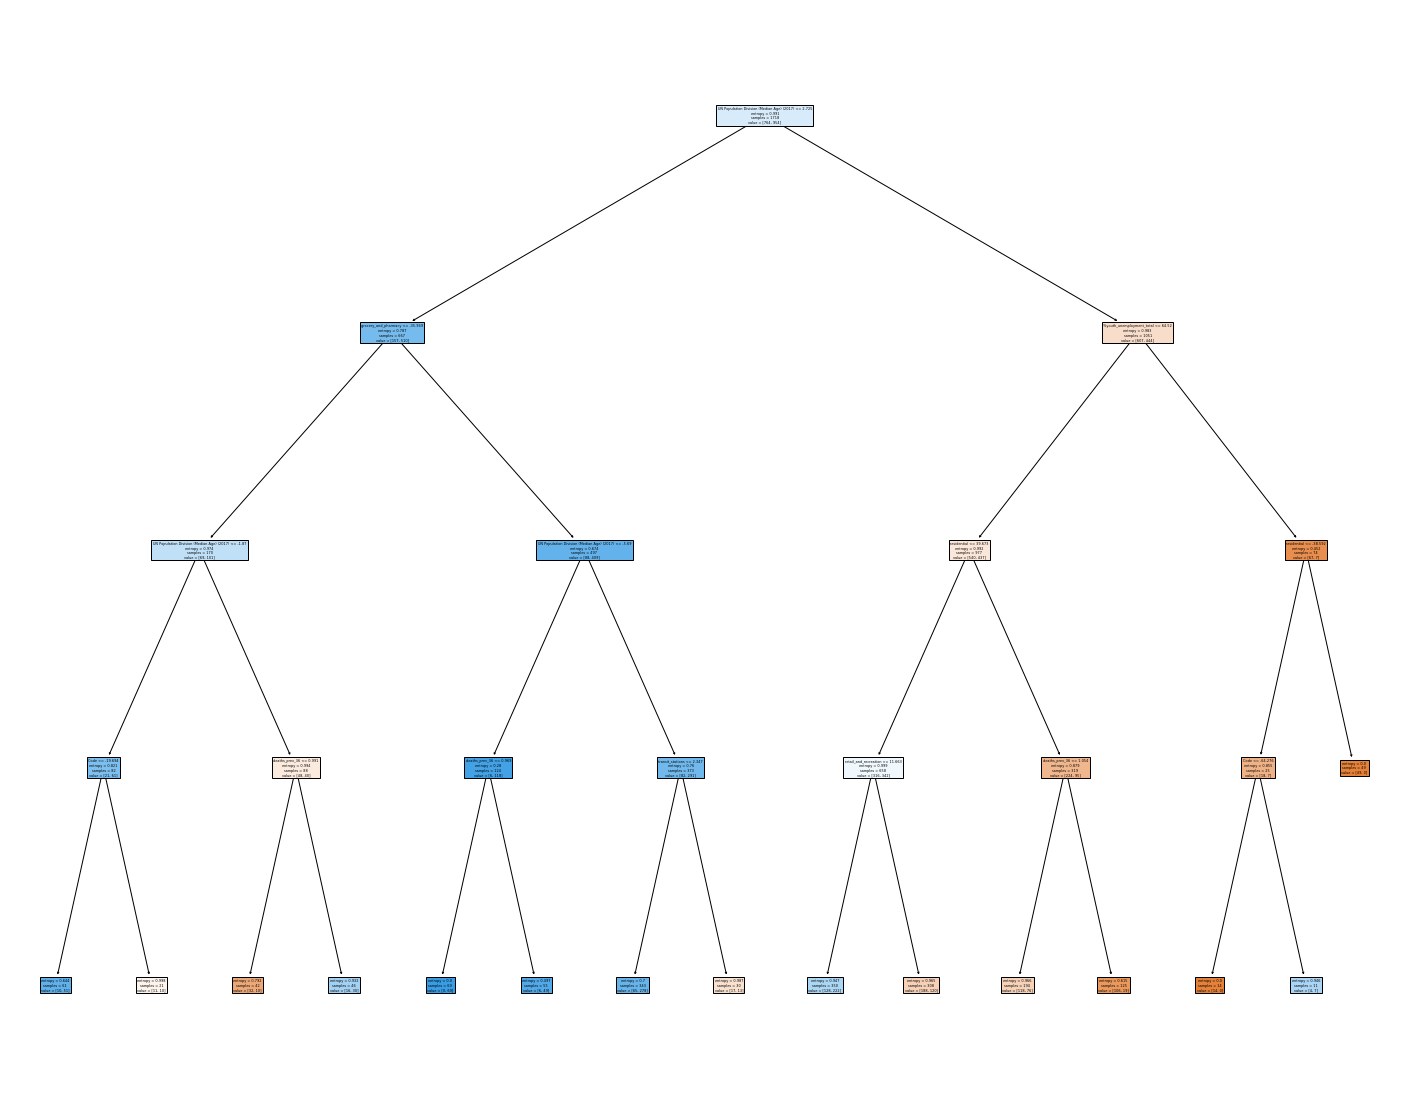

In [1258]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=df.columns,  
                   filled=True)

In [1259]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

model = XGBClassifier(objective='multi:softprob') 

model.fit(X_train, y_train)

y_pred = model.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred))

XGBoostError: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.

In [1260]:
from xgboost import plot_importance
plot_importance(model)

XGBoostError: need to call fit or load_model beforehand

pip install shap

In [1105]:
import numpy as np
import pandas as pd
import shap

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

In [1106]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

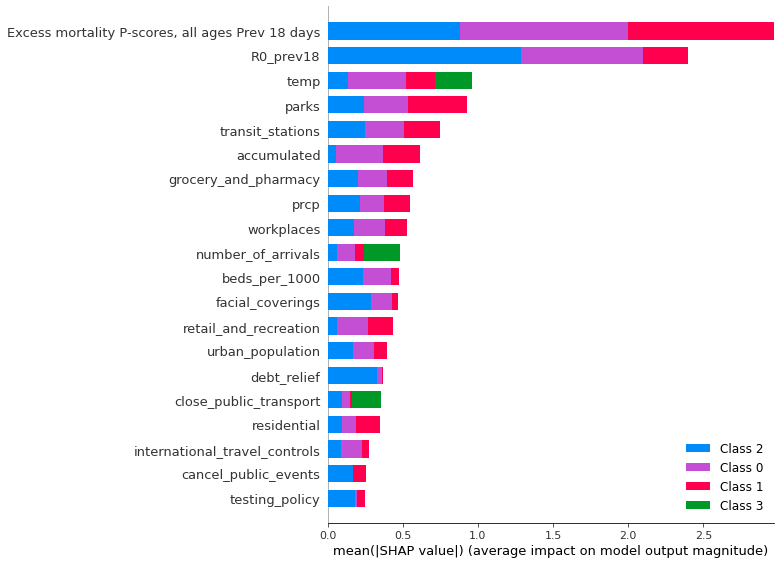

In [1107]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

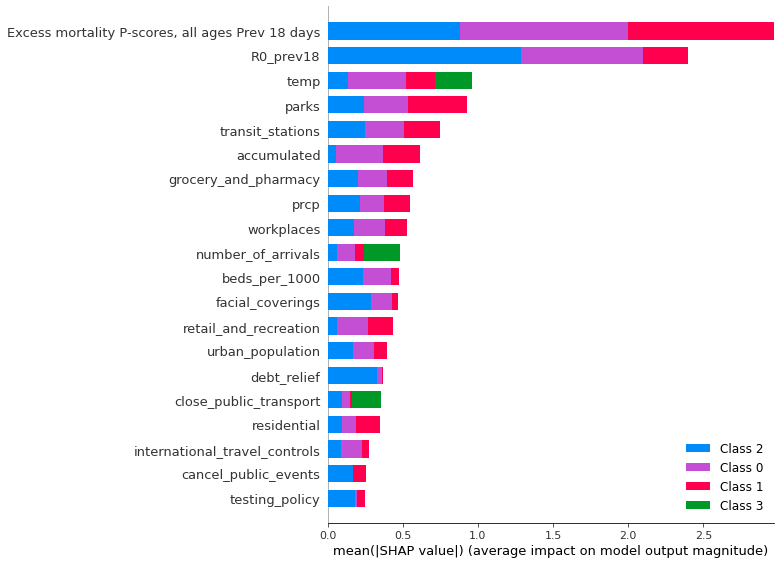

In [1108]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [1206]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:01<00:00, 15.87it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.99               0.66     0.66      0.99   
NearestCentroid                    0.90               0.62     0.62      0.95   
AdaBoostClassifier                 1.00               0.50     0.50      1.00   
LogisticRegression                 1.00               0.50     0.50      1.00   
XGBClassifier                      1.00               0.50     0.50      1.00   
SVC                                1.00               0.50     0.50      1.00   
SGDClassifier                      1.00               0.50     0.50      1.00   
RidgeClassifierCV                  1.00               0.50     0.50      1.00   
RidgeClassifier                    1.00               0.50     0.50      1.00   
RandomForestClassifier             1.00               0.50     0.50      1.00   
QuadraticDiscriminantAnalysi

In [777]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [781]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

In [782]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [783]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='multi:softprob',
                    silent=True, nthread=1)

In [788]:
folds = 3
param_comb = 5

random_search = GridSearchCV(xgb, params)

random_search.fit(X, y)

[14:37:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:37:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:37:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[14:39:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:39:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:40:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[14:42:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:42:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:42:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[14:44:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:44:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:44:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[14:47:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:47:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:47:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[14:50:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[14:57:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:57:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:57:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[14:59:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[15:01:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:01:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:01:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[15:03:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:03:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:03:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[15:05:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[15:08:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:08:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:08:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[15:10:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:10:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:10:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[15:11:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:11:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:11:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[15:13:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[15:16:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:16:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:16:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[15:18:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:18:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:18:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import LabelEncoder
# ML Metrics
from sklearn.metrics import make_scorer, accuracy_score
# ML Model selection
from sklearn.model_selection import train_test_split, GridSearchCV
# CatBoost model
from catboost import CatBoostClassifier, Pool

In [ ]:
clf = CatBoostClassifier()
params = {'iterations': [500],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
#           'eval_metric': ['Accuracy'],
#           'use_best_model': ['True'],
          'logging_level':['Silent'],
          'random_seed': [42]
         }
scorer = make_scorer(accuracy_score)
clf_grid = GridSearchCV(estimator=clf, param_grid=params, scoring=scorer, cv=5)